<a href="https://colab.research.google.com/github/imraunav/Computer-vision-EE511/blob/main/cv-GoogLeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import random_split
from tqdm import tqdm

In [2]:
# Download training data from open datasets.
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform= transforms.Compose([
    transforms.Resize(64),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
]),
)

# Download test data from open datasets.
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
]),
)

100%|██████████| 170498071/170498071 [00:12<00:00, 13532986.33it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_dataloader=DataLoader(test_data,batch_size=batch_size*2, num_workers=2, pin_memory=True)

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 64, 64])
Shape of y: torch.Size([64]) torch.int64


In [4]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [17]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', weights='GoogLeNet_Weights.IMAGENET1K_V1')

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [18]:
print(model)


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [19]:
# for param in model.parameters():
#     param.requires_grad = False

In [20]:
model.fc = nn.Linear(1024, 10)

In [21]:
for param in model.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [22]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    batch_losses = []
    for batch in tqdm(dataloader):
        X, y = batch
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = nn.functional.log_softmax(model(X), dim=-1)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())

    return sum(batch_losses)/len(batch_losses)

In [23]:
model.to(device)
print(model)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [25]:
max_epoch = 25

train_loss = []
for epoch in range(max_epoch):
  print(f"Epoch {epoch+1}")
  epoch_loss = train(train_dataloader,model,loss_fn,optimizer)
  print(f"Train loss: {epoch_loss}")
  train_loss.append(epoch_loss)

Epoch 1


100%|██████████| 782/782 [00:47<00:00, 16.62it/s]


Train loss: 0.6803599536571356
Epoch 2


100%|██████████| 782/782 [00:46<00:00, 16.79it/s]


Train loss: 0.44565669830192994
Epoch 3


100%|██████████| 782/782 [00:45<00:00, 17.07it/s]


Train loss: 0.36086030189147994
Epoch 4


100%|██████████| 782/782 [00:45<00:00, 17.08it/s]


Train loss: 0.30707090663368747
Epoch 5


100%|██████████| 782/782 [00:45<00:00, 17.12it/s]


Train loss: 0.2711794365416555
Epoch 6


100%|██████████| 782/782 [00:46<00:00, 16.99it/s]


Train loss: 0.2324345354895915
Epoch 7


100%|██████████| 782/782 [00:46<00:00, 16.72it/s]


Train loss: 0.20854890275546503
Epoch 8


100%|██████████| 782/782 [00:45<00:00, 17.09it/s]


Train loss: 0.18930032225254248
Epoch 9


100%|██████████| 782/782 [00:45<00:00, 17.05it/s]


Train loss: 0.16527044605892485
Epoch 10


100%|██████████| 782/782 [00:45<00:00, 17.04it/s]


Train loss: 0.15648316766094902
Epoch 11


100%|██████████| 782/782 [00:45<00:00, 17.14it/s]


Train loss: 0.13895920574274437
Epoch 12


100%|██████████| 782/782 [00:46<00:00, 16.74it/s]


Train loss: 0.12236721905858239
Epoch 13


100%|██████████| 782/782 [00:46<00:00, 16.85it/s]


Train loss: 0.11584497445567851
Epoch 14


100%|██████████| 782/782 [00:45<00:00, 17.08it/s]


Train loss: 0.1045074797005576
Epoch 15


100%|██████████| 782/782 [00:45<00:00, 17.24it/s]


Train loss: 0.10336886825816483
Epoch 16


100%|██████████| 782/782 [00:46<00:00, 16.83it/s]


Train loss: 0.0965081341052547
Epoch 17


100%|██████████| 782/782 [00:47<00:00, 16.44it/s]


Train loss: 0.08917876689509034
Epoch 18


100%|██████████| 782/782 [00:45<00:00, 17.08it/s]


Train loss: 0.08441995577577054
Epoch 19


100%|██████████| 782/782 [00:46<00:00, 16.86it/s]


Train loss: 0.07608294749990954
Epoch 20


100%|██████████| 782/782 [00:46<00:00, 16.87it/s]


Train loss: 0.07623398779769955
Epoch 21


100%|██████████| 782/782 [00:46<00:00, 16.92it/s]


Train loss: 0.06777340423121044
Epoch 22


100%|██████████| 782/782 [00:47<00:00, 16.58it/s]


Train loss: 0.0654563120446618
Epoch 23


100%|██████████| 782/782 [00:45<00:00, 17.05it/s]


Train loss: 0.05973188441081206
Epoch 24


100%|██████████| 782/782 [00:45<00:00, 17.07it/s]


Train loss: 0.061551720655881714
Epoch 25


100%|██████████| 782/782 [00:46<00:00, 16.90it/s]

Train loss: 0.05954884822585184


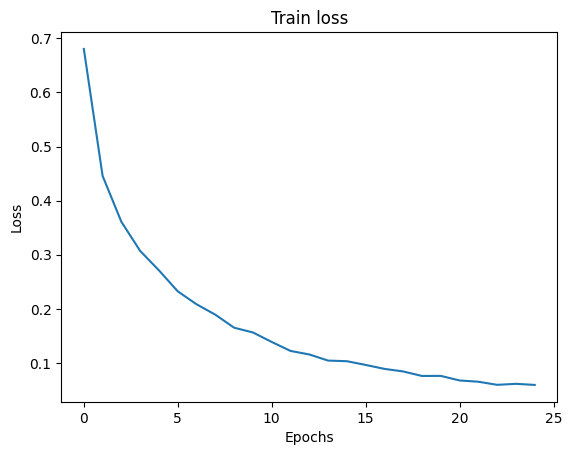

In [26]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.title("Train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [27]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [28]:
test(test_dataloader,model,loss_fn)

Test Error: 
 Accuracy: 90.2%, Avg loss: 0.394454 

